## Pima Indians Diabetes Database

**Life cycle of Machine learning Project**

* Understanding the Problem Statement
* Data Collection
* Exploratory data analysis
* Data Cleaning
* Data Pre-Processing
* Model Training
* Choose best model

### Context
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

### Problem statement
* The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.
* Based on the above features we need to classify whether the patients in the dataset have diabetes or not?


## 2) Data Collection
* We can get the data from kaggle from below link
https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database
* Data set consists of 768 rows and 9 columns



### 2.1 Importing Data and require packages

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

Importing the data into data frame

In [ ]:
import pandas as pd
df=pd.read_csv('/content/diabetes.csv')
df.shape

(768, 9)

In [ ]:
## Will give top five rows from data frame
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Summary of the dataset

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Checking null and data types in data set

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

There is no null values and all column types were either int or float

## 3)  Exploring data

In [ ]:
numeric_features=[feature for feature in df.columns if df[feature].dtypes != 'O']
categorical_features=[feature for feature in df.columns if df[feature].dtypes == 'O']
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 9 numerical features : ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

We have 0 categorical features : []


## Univariate Analysis

* The term univariate analysis refers to the analysis of one variable prefix “uni” means “one.” The purpose of univariate analysis is to understand the distribution of values for a single variable.

Other Type of Analysis are
* **Bivariate Analysis:** The analysis of two variables.
* **Multivariate Analysis:** The analysis of two or more variables.

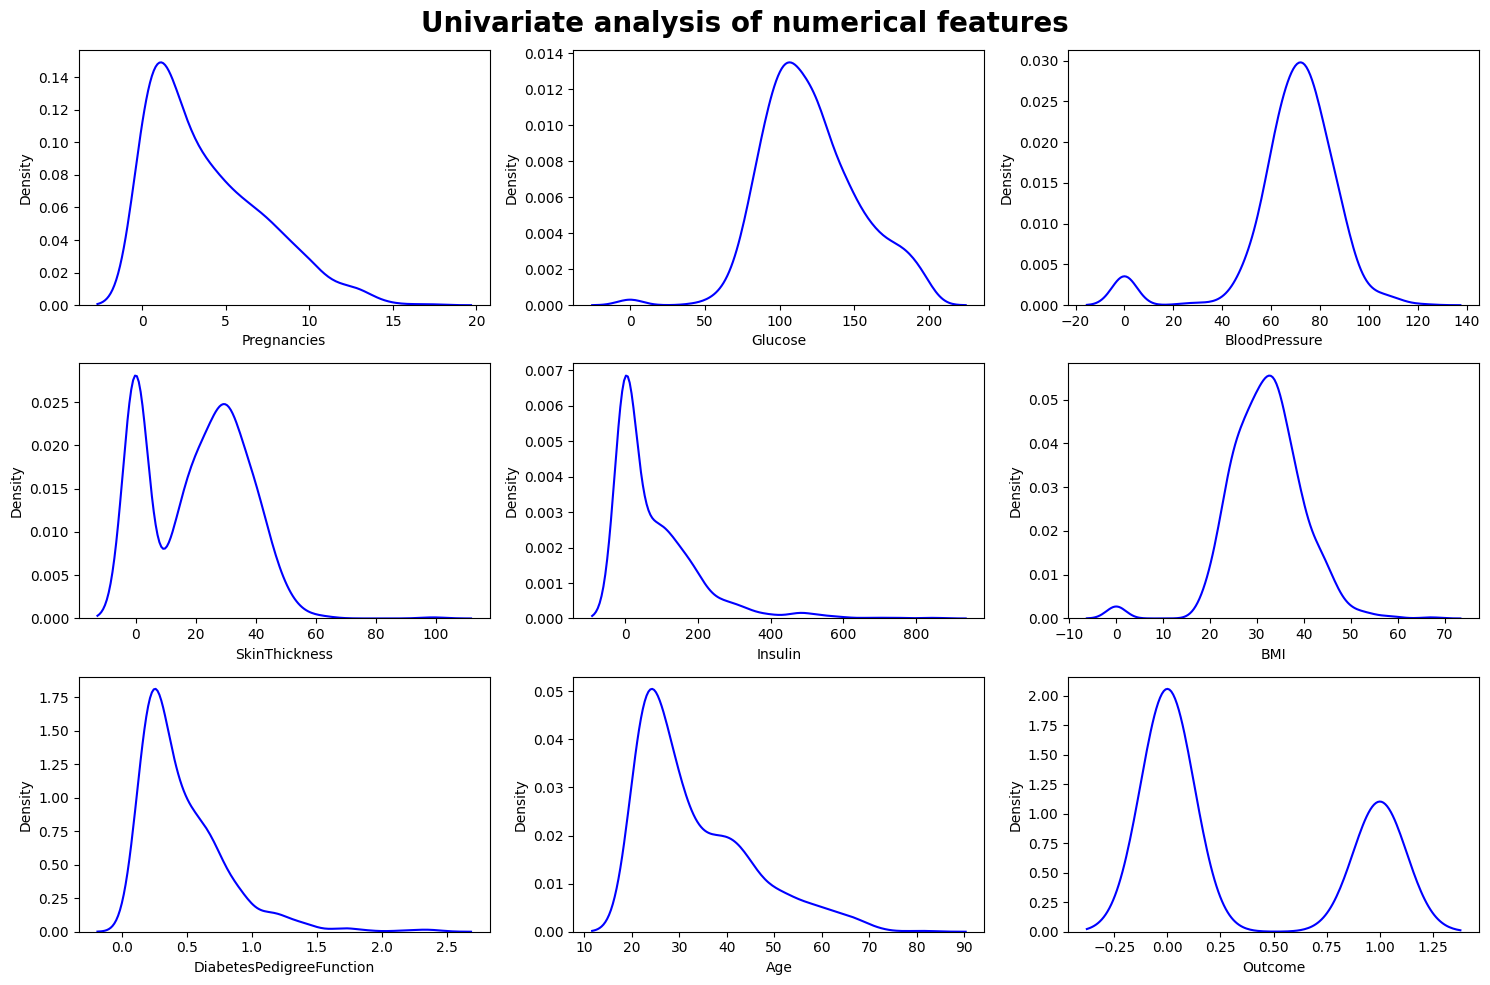

In [ ]:
plt.figure(figsize=(15,10))
plt.suptitle("Univariate analysis of numerical features",fontsize=20,fontweight='bold')

for i in range(len(numeric_features)):
  plt.subplot(3,3,i+1)
  sns.kdeplot(x=df[numeric_features[i]],color='blue')
  plt.xlabel(numeric_features[i])
  plt.tight_layout()


In [ ]:
discrete_features=[feature for feature in numeric_features if len(df[feature].unique())<=25]

continuous_features=[feature for feature in numeric_features if len(df[feature].unique()) > 25]

print('We have {} discrete features : {}'.format(len(discrete_features), discrete_features))
print('\nWe have {} continuous_features : {}'.format(len(continuous_features), continuous_features))

We have 2 discrete features : ['Pregnancies', 'Outcome']

We have 7 continuous_features : ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


##MultiCollinearity

<Axes: >

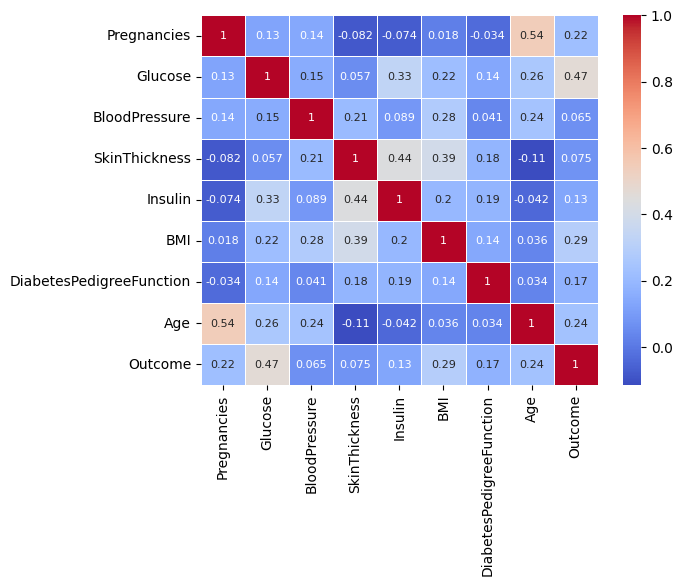

In [ ]:

sns.heatmap(df.corr(),annot=True,fmt=".2g",linewidths=0.5,annot_kws={'size':8},cmap="coolwarm")

* As you can see there is negative correlation between Pregnancies and skin thickness, Insulin,DiabetesPedigreeFunction and between Age and Skinthickness and insulin

* We can use VIF to find the mutlicollinearity between features as you can see below.
* VIF factor below says that how highly features correlated among them , usually as a rule of thumb when we get VIF above 5 or 10 then we consider as a highly correlated features.
* If any of the two fetaures will get greater than 5 or 10 then we can consider that the two features were highly correlated and can remove one of them or combining, creating a creating a new column out of them

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import pandas as pd

X = add_constant(df)  # Add a constant term for the intercept
VIF = pd.DataFrame()
VIF["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1]-1)] ## removing the target column as it is predicted column
VIF["features"] = X.columns[:-1]
VIF

,VIF Factor,features
0,39.646259,const
1,1.461247,Pregnancies
2,1.525018,Glucose
3,1.194716,BloodPressure
4,1.507471,SkinThickness
5,1.430267,Insulin
6,1.366240,BMI
7,1.082105,DiabetesPedigreeFunction
8,1.594364,Age


 * VIF results indicate that multicollinearity is not a concern for our dataset, allowing you to proceed with modeling without needing to address multicollinearity issues explicitly. This means that each of our predictors can reasonably be expected to provide unique information to predict the outcome

### Distribution of Discrete varaible with outcome

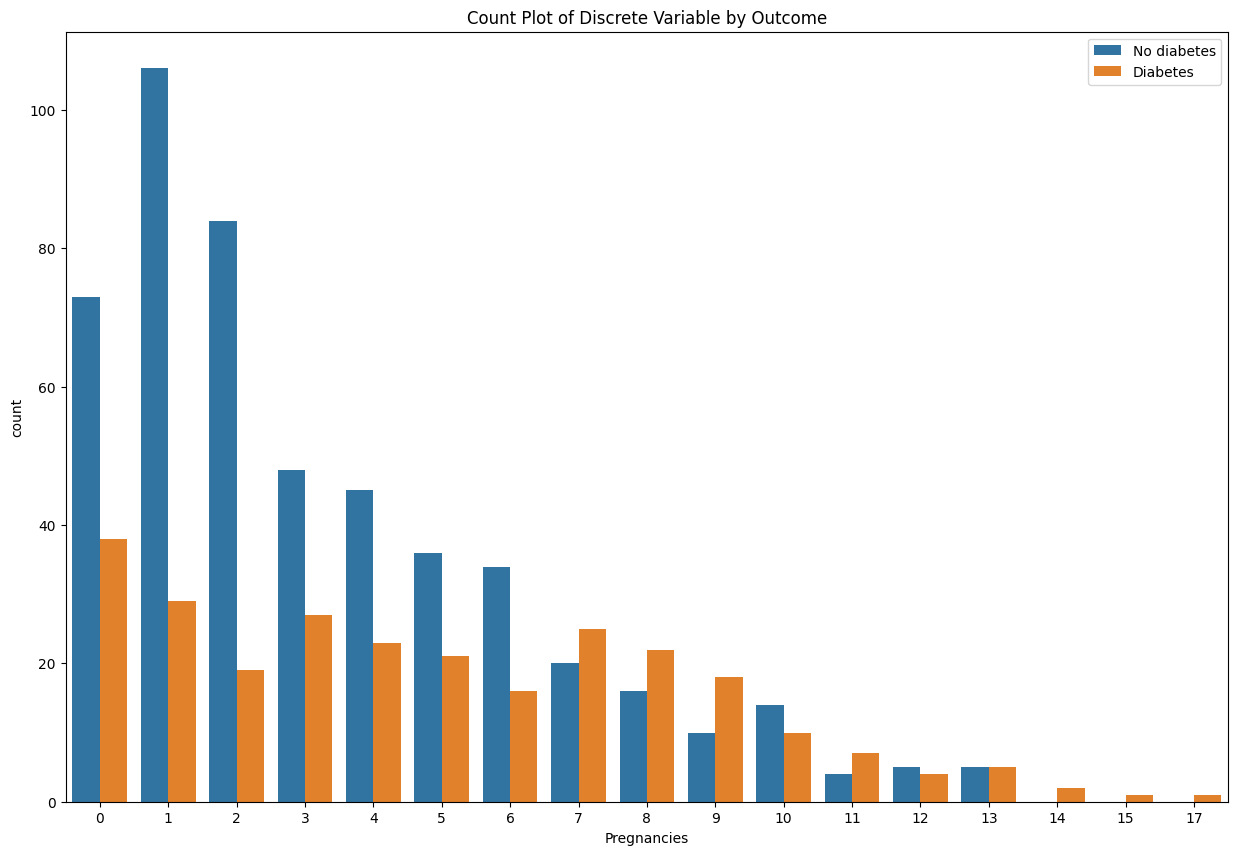

In [ ]:
clr=['#1E90FF', '#DC143C']
plt.figure(figsize=(15,10))
plt.title("Distribution of Pregnancies with outcome ")
sns.countplot(x='Pregnancies', hue='Outcome', data=df)
plt.title('Count Plot of Discrete Variable by Outcome')
plt.legend(['No diabetes','Diabetes'])
plt.show()

Outcome              0           1
Pregnancies                       
0            65.765766   34.234234
1            78.518519   21.481481
2            81.553398   18.446602
3            64.000000   36.000000
4            66.176471   33.823529
5            63.157895   36.842105
6            68.000000   32.000000
7            44.444444   55.555556
8            42.105263   57.894737
9            35.714286   64.285714
10           58.333333   41.666667
11           36.363636   63.636364
12           55.555556   44.444444
13           50.000000   50.000000
14            0.000000  100.000000
15            0.000000  100.000000
17            0.000000  100.000000


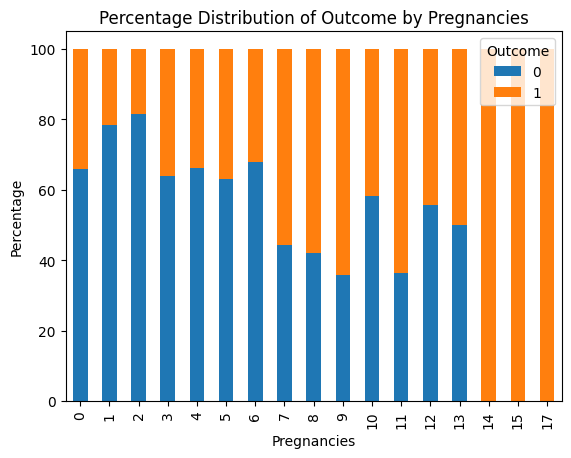

In [ ]:
import pandas as pd

# Creating a cross tabulation
cross_tab = pd.crosstab(index=df['Pregnancies'], columns=df['Outcome'], normalize='index') * 100

# Displaying the cross tabulation
print(cross_tab)

# Visualizing the cross tabulation
cross_tab.plot(kind='bar', stacked=True)
plt.title('Percentage Distribution of Outcome by Pregnancies')
plt.ylabel('Percentage')
plt.xlabel('Pregnancies')
plt.legend(title='Outcome', loc='upper right')
plt.show()

In [ ]:
from scipy.stats import chi2_contingency
chi2_test=[]
chi2,P,_,_=chi2_contingency(pd.crosstab(df['Pregnancies'],df['Outcome']))
chi2,P
if P<0.05:
  print("A low p-value (typically <0.05) indicates that there is a significant association between the Pregnancies and the Outcome.")


A low p-value (typically <0.05) indicates that there is a significant association between the Pregnancies and the Outcome.


##4)Visulaization


###4.1)Visualizing the target feature

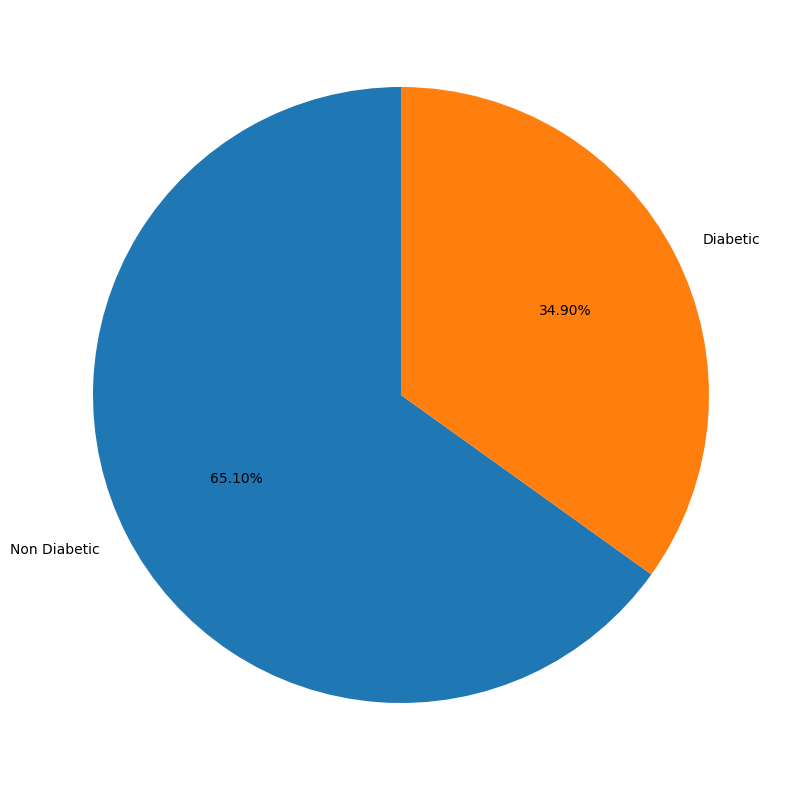

In [ ]:
percentage_outcome=df.Outcome.value_counts(normalize=True)*100
labels=['Non Diabetic','Diabetic']
percentage_outcome
fig,ax=plt.subplots(figsize=(15,10))
ax.pie(percentage_outcome,labels=labels,startangle=90,autopct="%1.2f%%")
plt.show()

* As you can see there is high level of outcomes where No Diabetes(0) is present when compared to Diabetes(i.e 1), we can say it is imbalanced data



###4.2) Does the Continuous features, any impact on outcome

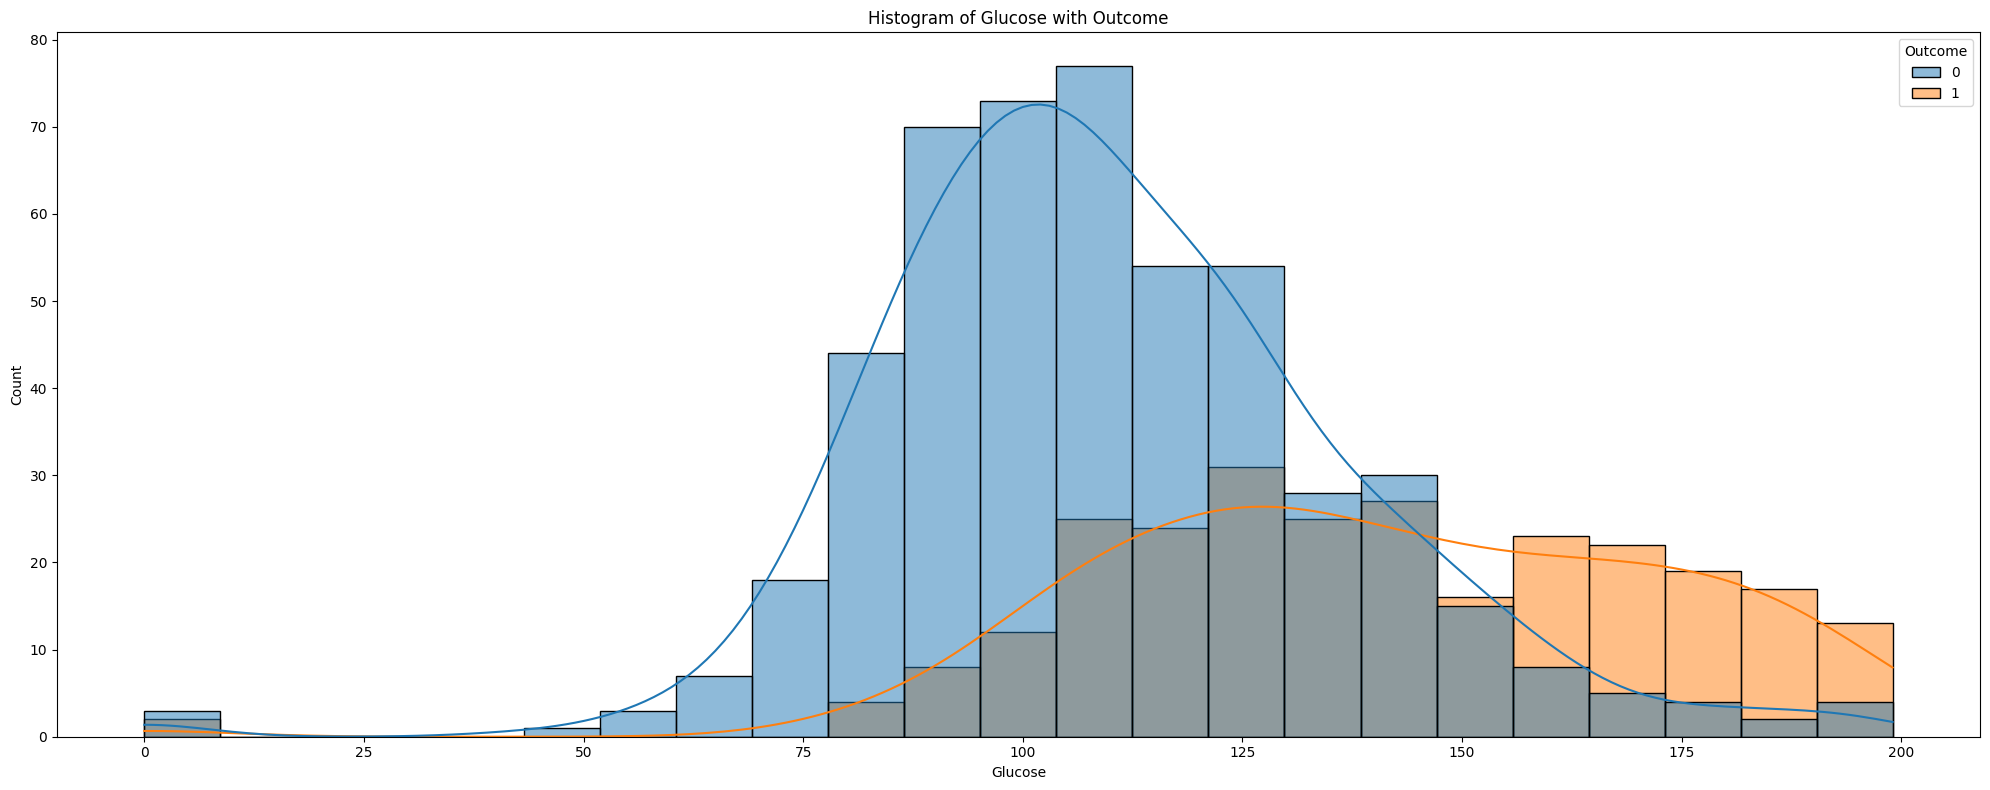

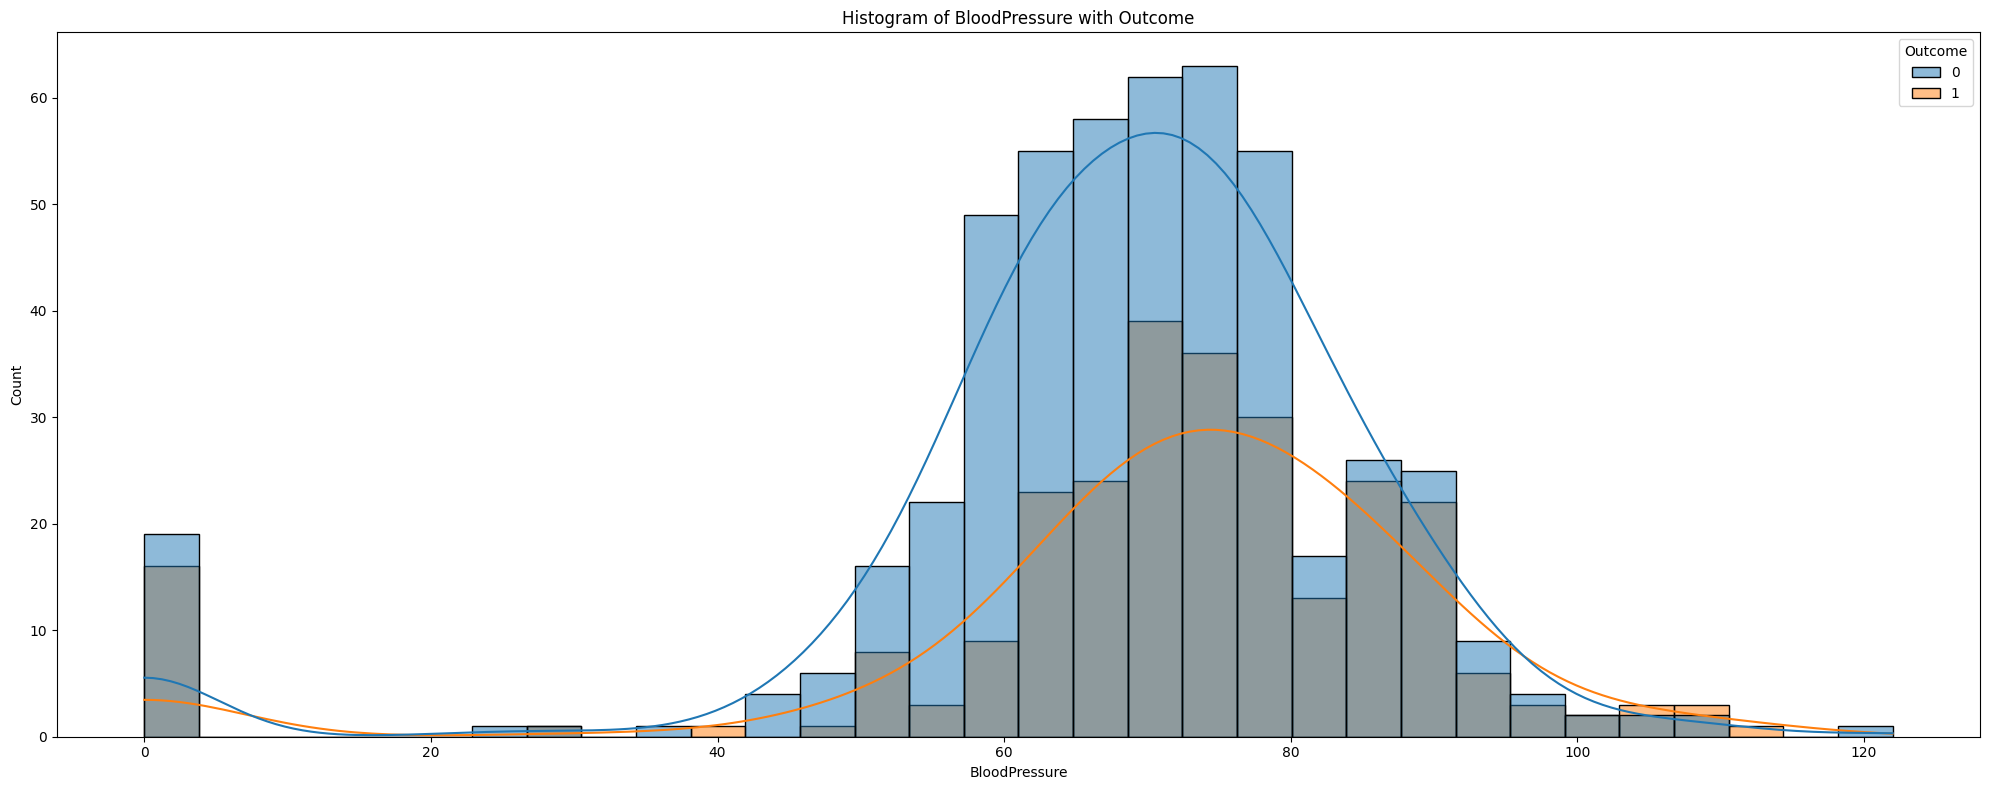

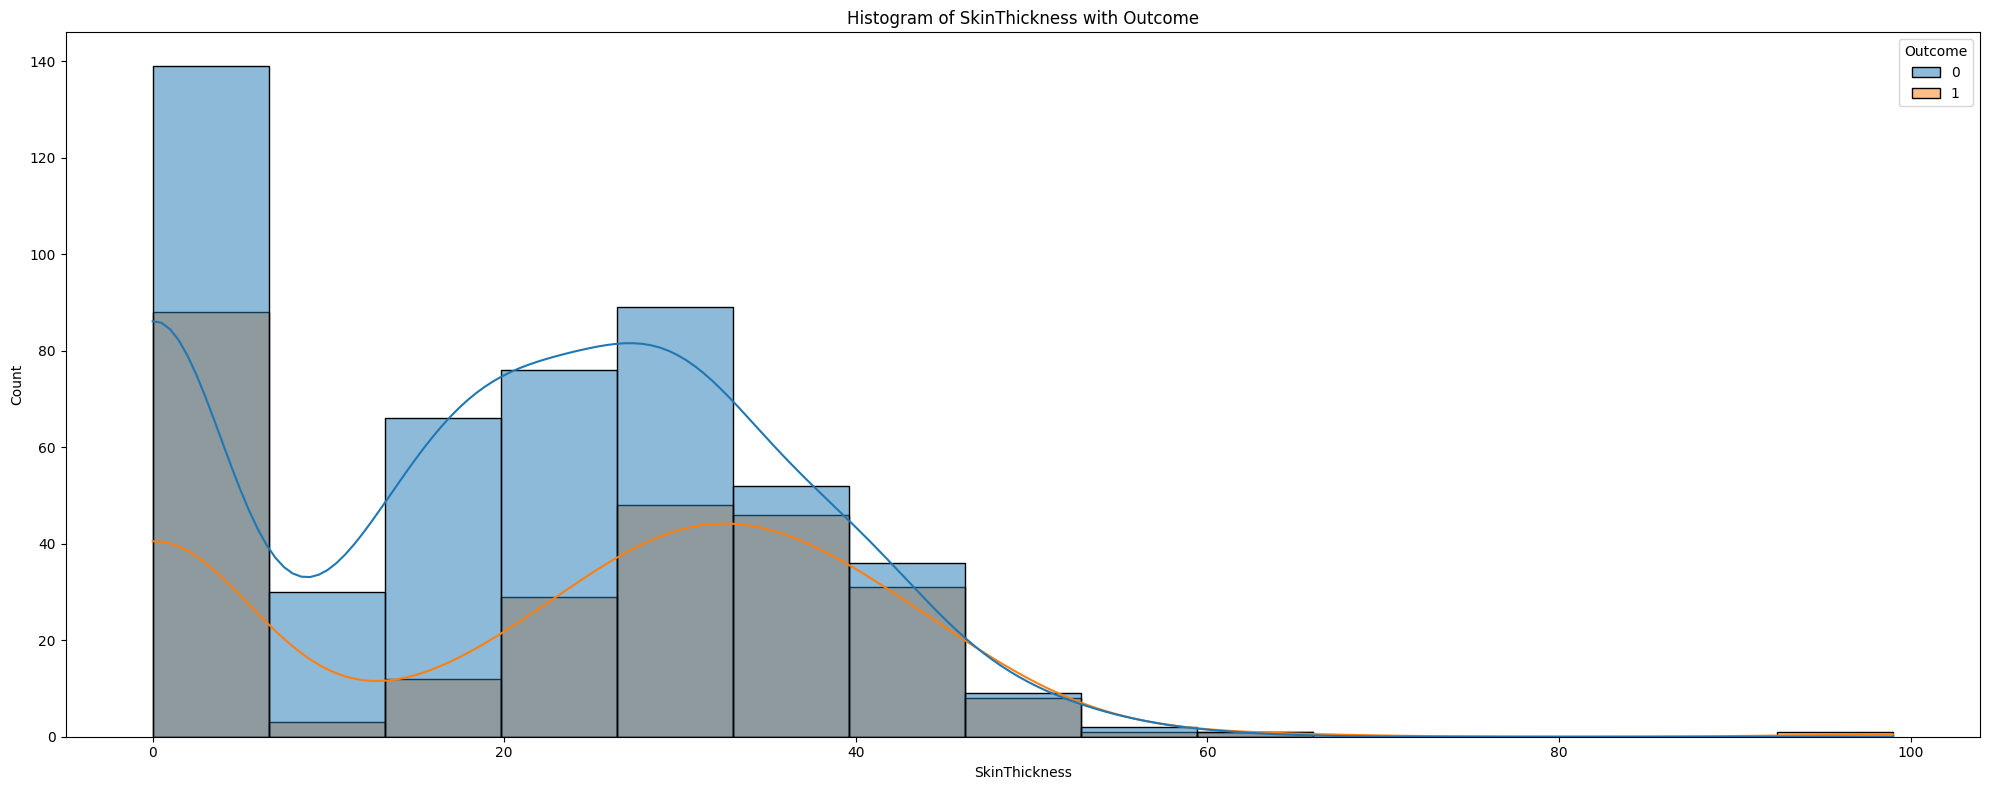

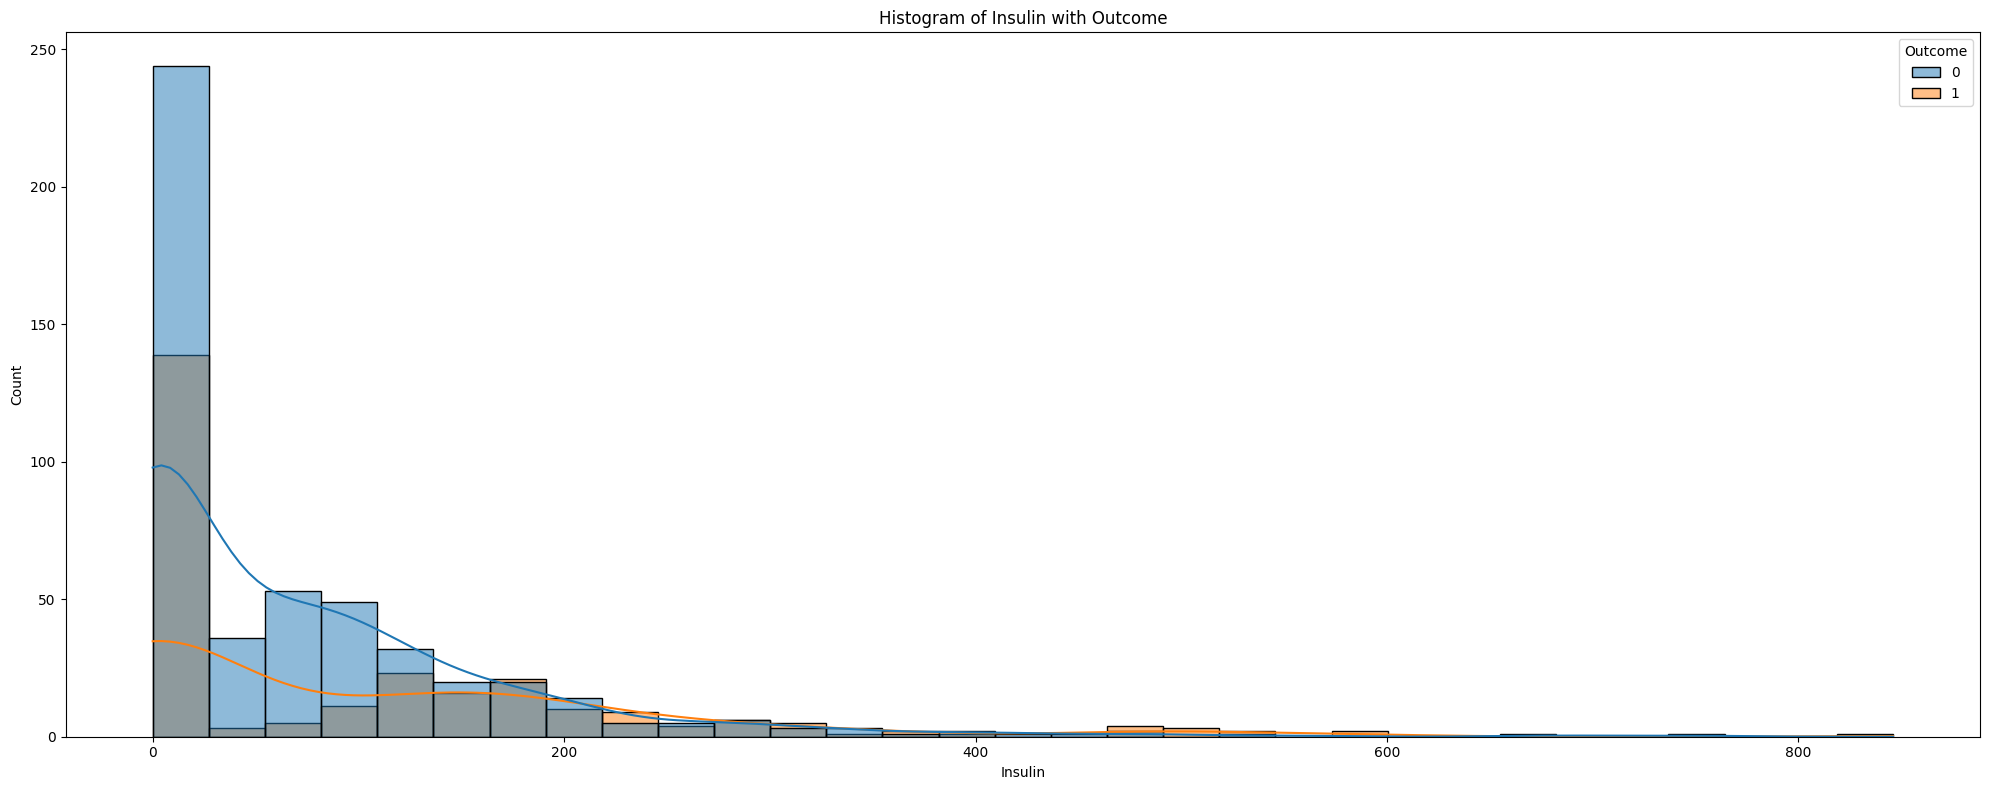

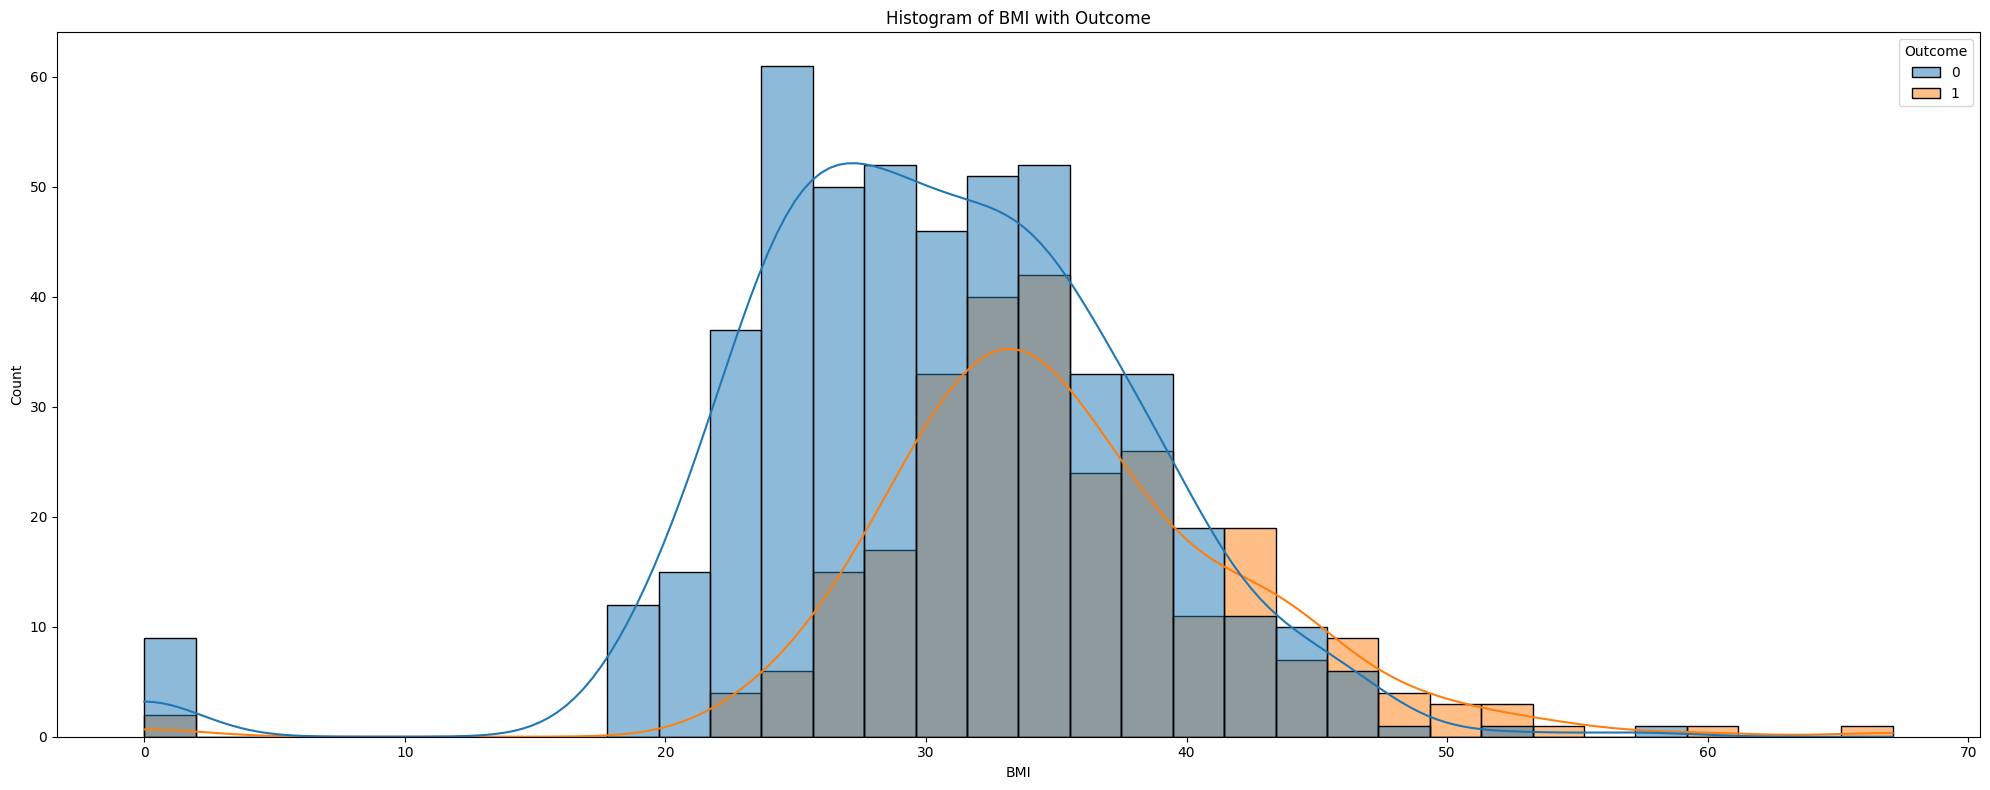

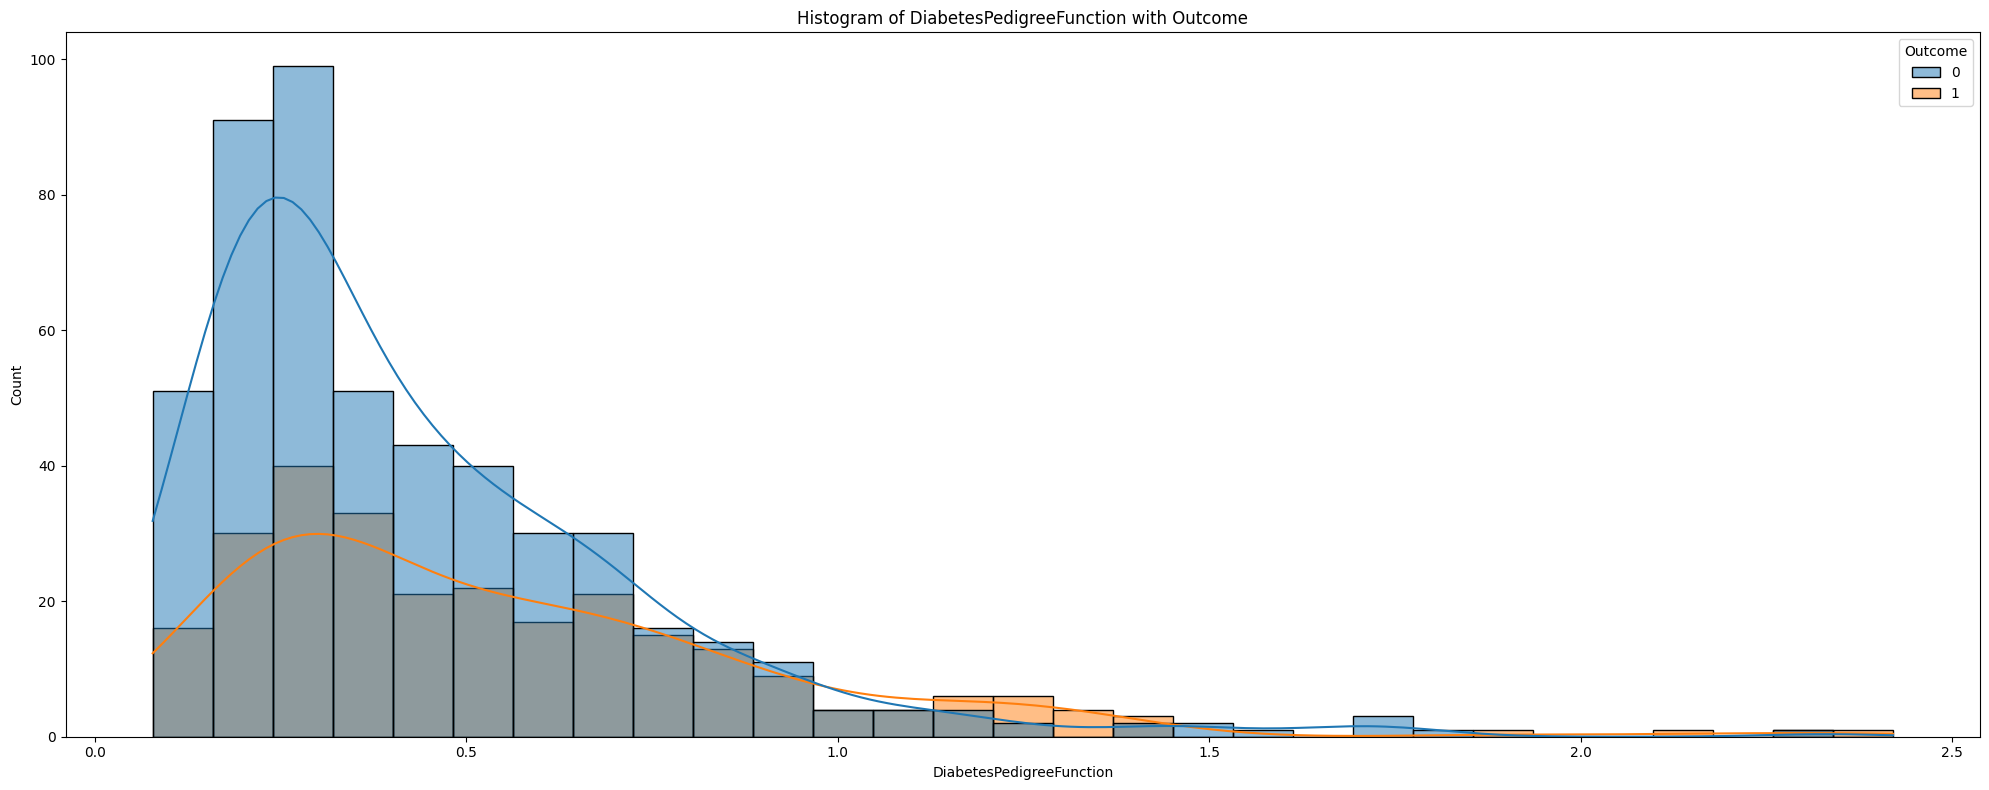

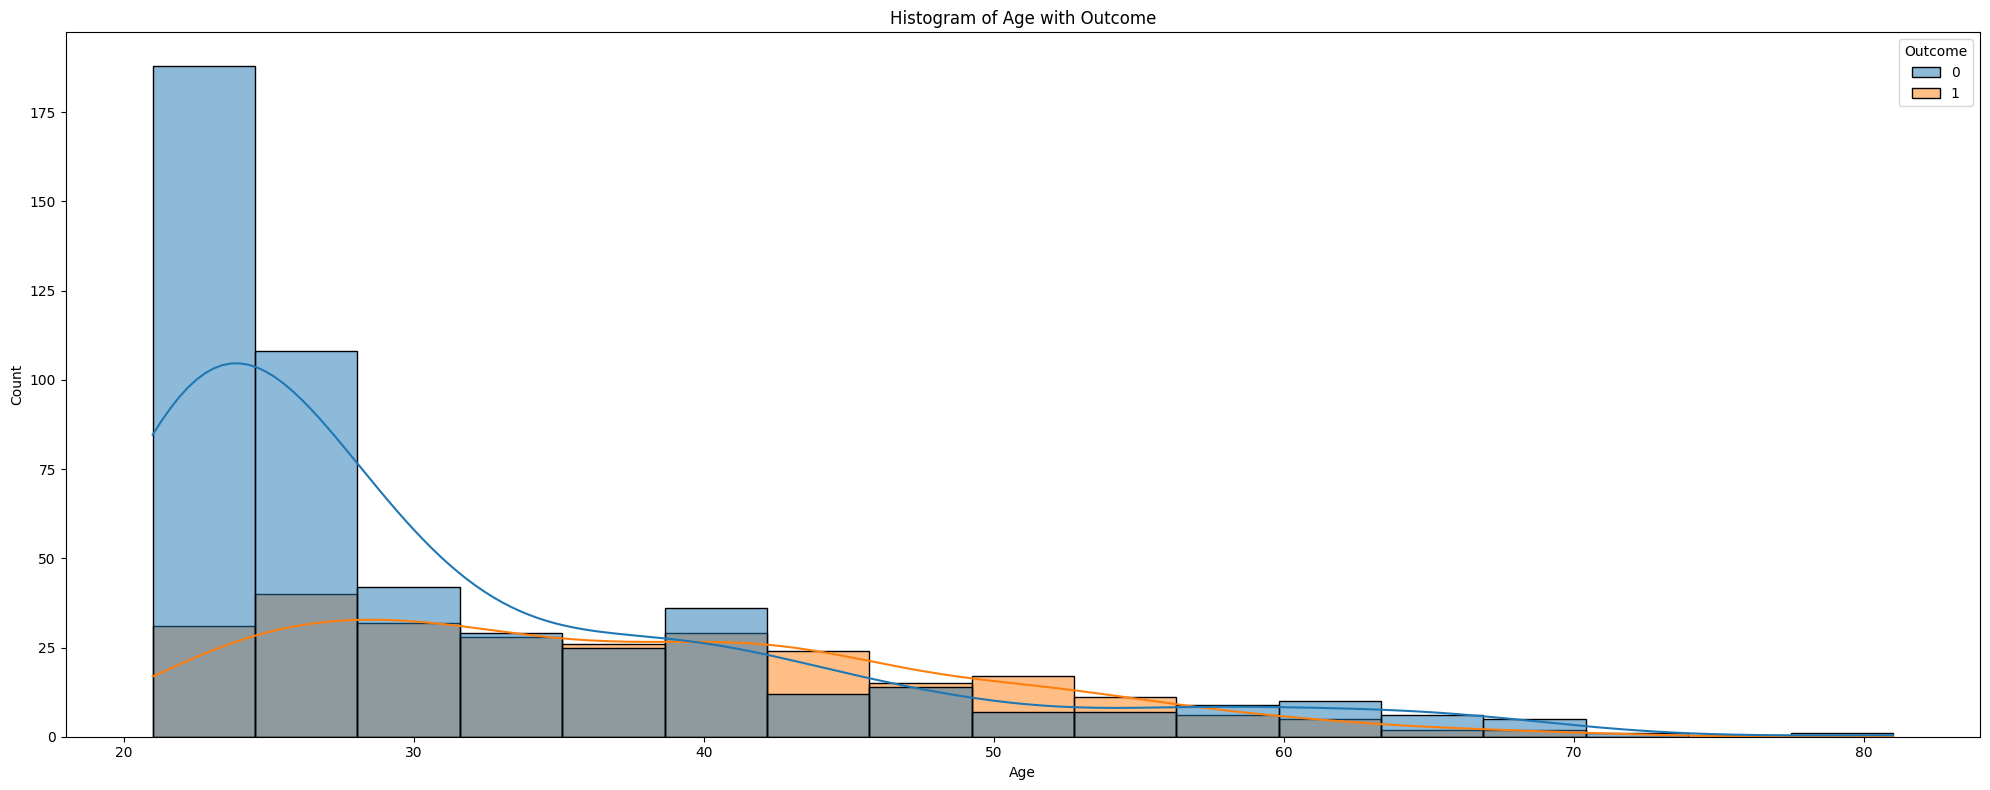

In [ ]:
##We can create a loop where we can plot all continuous features with outcome
for i in continuous_features:
  plt.figure(figsize=(20,8))
  sns.histplot(data=df,x=i,hue="Outcome",kde=True)
  plt.title(f"Histogram of {i} with Outcome")
  plt.xlabel(i)
  plt.tight_layout()



* From the above figures we can say that there are some outliers and also there is 0 value for some of the features and skewness in data so  we can deal with it in feature engineering  
* Age with above 40 and below 55 high cases of  Diabetic
* BMI with above 42 will having high cases of  diabetic
* BP with 105 to 120 having high cases of diabetic
* Glucose with 150 to 200 having high cases of diabeic

###Final Report
* There is no high correlation between the features present as we have seen in Correlation matrix and VIF(variance-Inflation-Factor)
* There are some outliers in some features and '0' values will be handled in Feature engineering
* Target column Outcome is imbalanced can be handles in next step  

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#------------------------------Feature Engineering and Model training----------------------------


## Data Preprocessing

### Importing all requrired packages

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.pandas.set_option("display.max_columns", None)
# Create Dataframe
df1 = pd.read_csv("/content/diabetes.csv")
# Print shape of dataset
print(df.shape)

NameError: name 'df' is not defined

### Data cleaning

### Handling Missing values

* Handling missing values
* Handling duplicates
* Check data type
* Understand the data type


#### Checking null values

In [4]:
df1.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

There are no null values in data set

#### Checking duplicates

In [5]:
df1.duplicated().sum()

0

There are no duplicates values

## Feature Engineering

In [6]:
df1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Handling Zeros

In [8]:
for col in df1.columns:
  print(col,":",df1[df1[col]==0][col].count())

Pregnancies : 111
Glucose : 5
BloodPressure : 35
SkinThickness : 227
Insulin : 374
BMI : 11
DiabetesPedigreeFunction : 0
Age : 0
Outcome : 500


* Only 5 columns were having Zero columns i.e ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
* 'DiabetesPedigreeFunction', 'Age' were not having 0 values and Outcome is target column and Pregnancies columns is intend to be have 0 values as it is discrete value
      

In [10]:
df1[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df1[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

from sklearn.impute import KNNImputer


# Initialize the imputer
imputer = KNNImputer(n_neighbors=3)

# Impute the null values
imputed_df = pd.DataFrame(imputer.fit_transform(df1), columns=df1.columns)
imputed_df


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.000000,125.333333,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.000000,66.666667,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,30.000000,195.000000,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.000000,94.000000,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.000000,168.000000,43.1,2.288,33.0,1.0
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.000000,180.000000,32.9,0.171,63.0,0.0
764,2.0,122.0,70.0,27.000000,166.666667,36.8,0.340,27.0,0.0
765,5.0,121.0,72.0,23.000000,112.000000,26.2,0.245,30.0,0.0
766,1.0,126.0,60.0,35.333333,120.666667,30.1,0.349,47.0,1.0


### Split the data frame into X and y test

In [11]:
X=imputed_df.drop('Outcome',axis=1)
y=imputed_df['Outcome']


###Types of Features

####Numerical Features

In [12]:
numeric_features=[feature for feature in X.columns if df1[feature].dtype !='O']
numeric_features

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

* All features present in data set were numerical features

#### Discrete Features

In [13]:
discrete_features=[feature for feature in X if len(X[feature].unique())<=25]
discrete_features

['Pregnancies']

#### Continuous Feature

In [14]:
continuous_features=[feature for feature in X if len(X[feature].unique())>=25]
continuous_features

['Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

### Feature Transformation

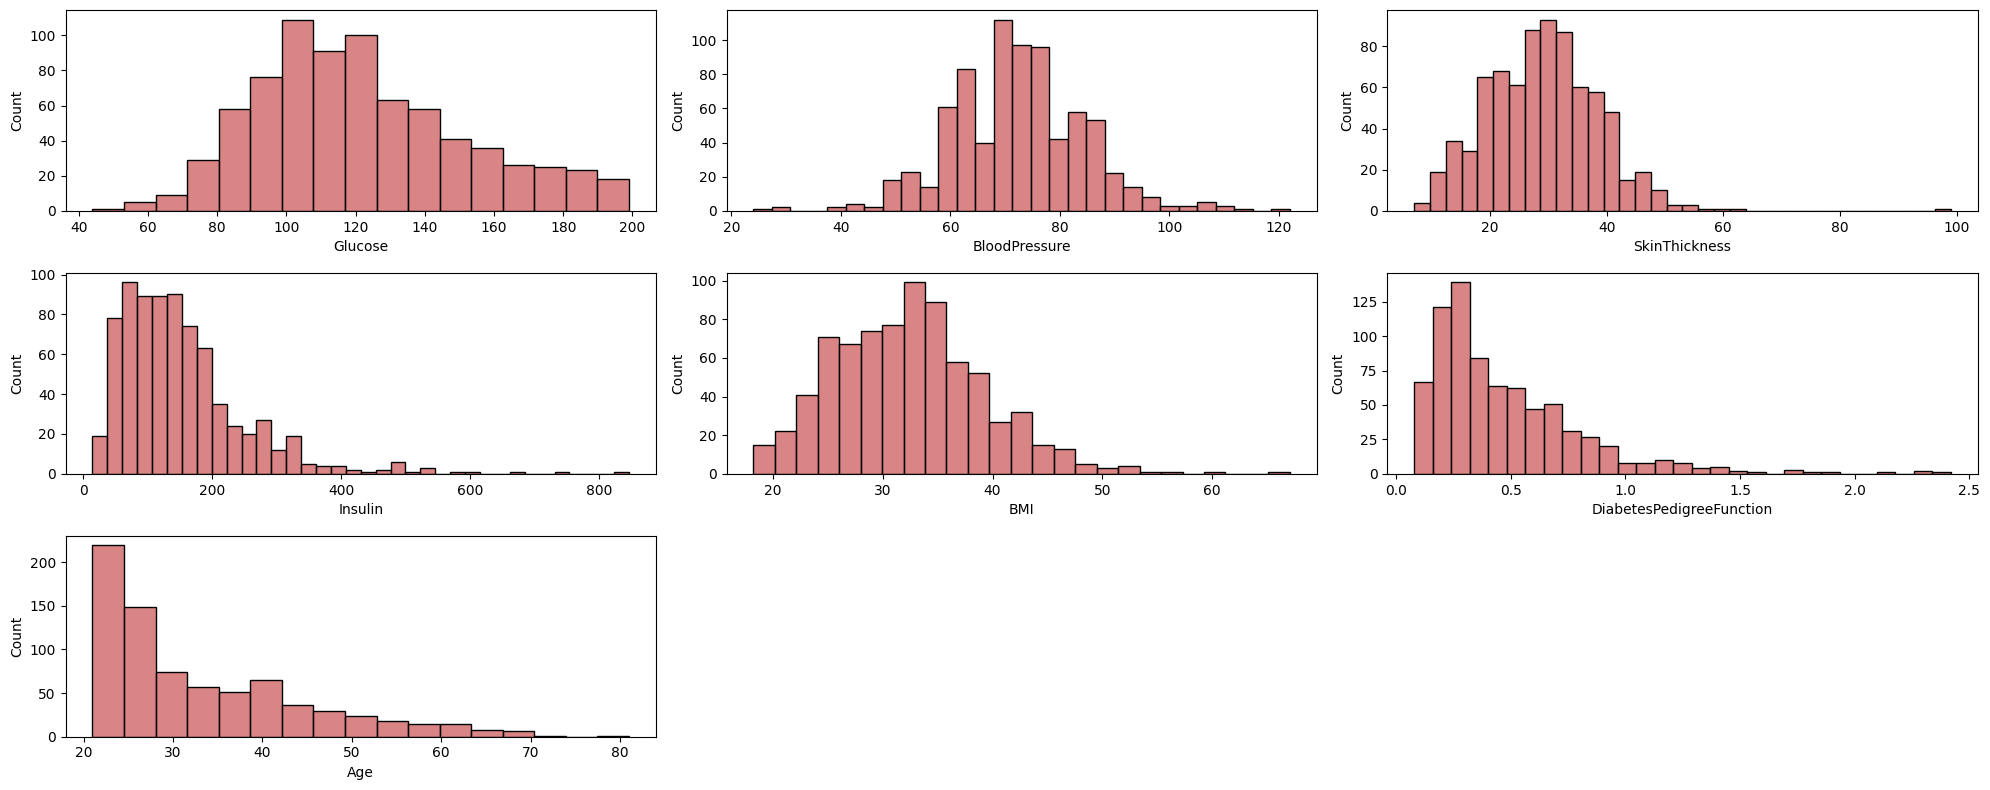

In [15]:
# distribution of data before scaling
plt.figure(figsize=(20, 8))
for i, col in enumerate(['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']):
    plt.subplot(3, 3, i+1)
    sns.histplot(x=X[col], color='indianred')
    plt.xlabel(col)
    plt.tight_layout()

* Apply a power transform featurewise to make data more Gaussian-like.

Power transforms are a family of parametric, monotonic transformations that are applied to make data more Gaussian-like. This is useful for modeling issues related to heteroscedasticity (non-constant variance), or other situations where normality is desired.

Currently, PowerTransformer supports the Box-Cox transform and the Yeo-Johnson transform.

### Checking Skewness
**What is Skewness ?**

* Skewness refers to a distortion or asymmetry that deviates from the symmetrical bell curve, or normal distribution, in a set of data. If the curve is shifted to the left or to the right, it is said to be skewed. Skewness can be quantified as a representation of the extent to which a given distribution varies from a normal distribution. A normal distribution has a skew of zero

In [16]:
X[continuous_features].skew(axis=0,skipna=True)

Glucose                     0.530240
BloodPressure               0.143756
SkinThickness               0.646509
Insulin                     2.026775
BMI                         0.605240
DiabetesPedigreeFunction    1.919911
Age                         1.129597
dtype: float64

### Apply Power Transformer to Check if it can reduces the outliers

In [17]:
from sklearn.preprocessing import PowerTransformer

pt=PowerTransformer(method='yeo-johnson')
transform_features=['Insulin','DiabetesPedigreeFunction','Age']
X_copy=pt.fit_transform(X[transform_features])


- Here Yeo-Johnson is used and it supports both positive or negative data for transformation.
- So Power Transformer with yeo-johnson can be used.

In [18]:
X_copy=pd.DataFrame(X_copy,columns=transform_features)

In [19]:
X_copy.skew(axis=0,skipna=True)

Insulin                     0.003128
DiabetesPedigreeFunction    0.142321
Age                         0.150219
dtype: float64

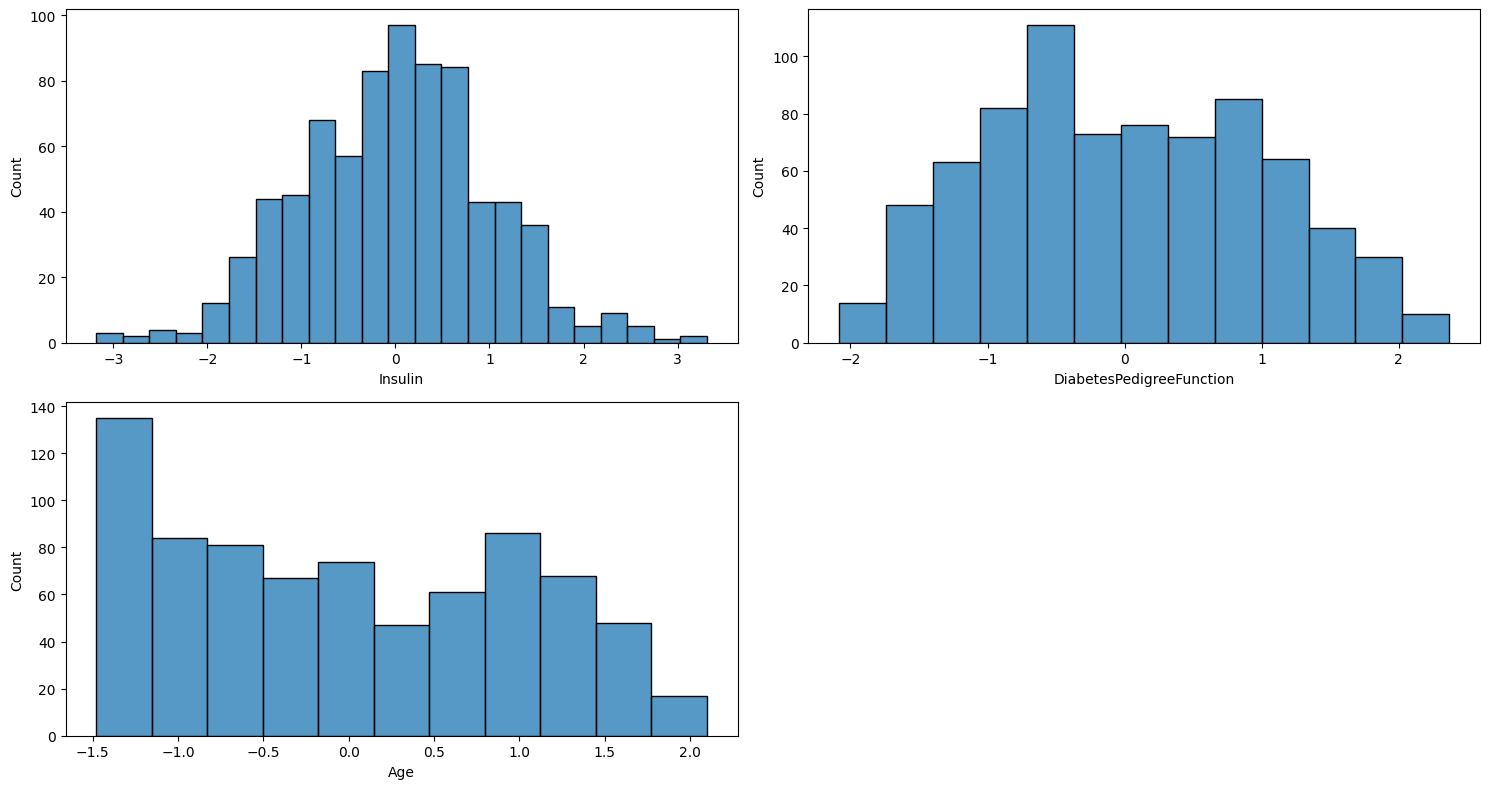

In [20]:
plt.figure(figsize=(15,8))
for i,col in enumerate(transform_features):
  plt.subplot(2,2,i+1)
  sns.histplot(X_copy[col])
  plt.xlabel(col)
  plt.tight_layout()

### Feature Encoding and Scaling



**Standard Scaler**
* Standardize features by removing the mean and scaling to unit variance.
 We can perform standardscaling on all numerical values

**Power Transformer**
* Power transforms are a technique for transforming numerical input or output variables to have a Gaussian or more-Gaussian-like probability distribution.

In [24]:
from sklearn.preprocessing import  StandardScaler, PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

Std=StandardScaler()
numeric_features=['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']
Transformer=['Insulin','DiabetesPedigreeFunction','Age']
transform_pipe=Pipeline(steps=[('PowerTransorm',PowerTransformer(method='yeo-johnson'))])
preprocessor=ColumnTransformer(transformers=[
    ('Power_transform',transform_pipe,Transformer),
    ('StandardScaler',Std,numeric_features)
])

X=preprocessor.fit_transform(X)


### Balancing the data

To manage imbalance the data of target variable we need to apply some method to balance it by using SMOTEENN {**(Synthetic Minority Over-sampling Technique) and ENN (Edited Nearest Neighbors)**}
* This imbalance can lead to poor model performance, particularly for the minority class.
* SMOTE: Works by synthesizing new instances of the minority class between existing (minority class) instances.
* ENN: Aims to clean the dataset by removing instances of the majority class that are nearest neighbors of the minority class, potentially reducing the risk of overfitting introduced by SMOTE.
* SMOTEENN: Effectively combines these approaches to both augment the minority class and clean the dataset for better generalization

In [35]:
from imblearn.combine import SMOTETomek,SMOTEENN

smt=SMOTEENN(random_state=42,sampling_strategy='minority')
print("before sampling target data has 0 and 1 with ",np.bincount(y)," values and difference between them is",abs(np.diff((np.bincount(y)))))
X_res,y_res=smt.fit_resample(X,y)
print("after sampling target data has 0 and 1 with  ",np.bincount(y_res)," values and difference between them is",abs(np.diff((np.bincount(y_res)))))


before sampling target data has 0 and 1 with  [500 268]  values and difference between them is [232]
after sampling target data has 0 and 1 with   [262 329]  values and difference between them is [67]


* As you can see there is difference in classes present in target column , we have managed to bring balance in data

## Train Test Split
- The train-test split procedure is used to estimate the performance of machine learning algorithms when they are used to make predictions on data not used to train the model.


In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_res,y_res,test_size=0.2,random_state=42)
X_train.shape,X_test.shape,y_train.shape

((472, 11), (119, 11), (472,))

In [42]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [41]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 2.9 MB/s eta 0:00:00


In [39]:
def evaluate_clf(true, predicted):
    acc = accuracy_score(true, predicted) # Calculate Accuracy
    precision = precision_score(true, predicted) # Calculate Precision
    recall = recall_score(true, predicted)  # Calculate Recall
    f1 = f1_score(true, predicted) # Calculate F1-score
    roc_auc = roc_auc_score(true, predicted) #Calculate Roc
    return acc, precision, recall, f1 , roc_auc

In [43]:
models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression(),
     "K-Neighbors Classifier": KNeighborsClassifier(),
    "XGBClassifier": XGBClassifier(),
    "CatBoosting Classifier": CatBoostClassifier(verbose=False),
     "Support Vector Classifier": SVC(),
    "AdaBoost Classifier": AdaBoostClassifier()
}

In [44]:
# Create a function which can evaluate models and return a report
def evaluate_models(X, y, models):
    '''
    This function takes in X and y and models dictionary as input
    It splits the data into Train Test split
    Iterates through the given model dictionary and evaluates the metrics
    Returns: Dataframe which contains report of all models metrics with cost
    '''
    # separate dataset into train and test
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

    models_list = []
    accuracy_list = []
    auc= []

    for i in range(len(list(models))):
        model = list(models.values())[i]
        model.fit(X_train, y_train) # Train model

        # Make predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Training set performance
        model_train_accuracy,model_train_precision,model_train_recall,model_train_f1,model_train_rocauc_score=evaluate_clf(y_train ,y_train_pred)


        # Test set performance
        model_test_accuracy,model_test_precision,model_test_recall,model_test_f1,model_test_rocauc_score=evaluate_clf(y_test, y_test_pred)

        print(list(models.keys())[i])
        models_list.append(list(models.keys())[i]) ## Append to the list of models

        print('Model performance for Training set')
        print("- Accuracy: {:.4f}".format(model_train_accuracy))
        print('- F1 score: {:.4f}'.format(model_train_f1))
        print('- Precision: {:.4f}'.format(model_train_precision))
        print('- Recall: {:.4f}'.format(model_train_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

        print('-----------------------------------------------------------------')

        print('Model performance for Test set')
        print('- Accuracy: {:.4f}'.format(model_test_accuracy))
        accuracy_list.append(model_test_accuracy) ## Append to the list of accuracy
        print('- F1 score: {:.4f}'.format(model_test_f1))
        print('- Precision: {:.4f}'.format(model_test_precision))
        print('- Recall: {:.4f}'.format(model_test_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))
        auc.append(model_test_rocauc_score)
        print('='*35)
        print('\n')

    report=pd.DataFrame(list(zip(models_list, accuracy_list)), columns=['Model Name', 'Accuracy']).sort_values(by=['Accuracy'], ascending=False)

    return report

## Model Training

In [45]:
Model_report=evaluate_models(X_res,y_res,models)
Model_report

Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
-----------------------------------------------------------------
Model performance for Test set
- Accuracy: 0.9160
- F1 score: 0.9265
- Precision: 0.8873
- Recall: 0.9692
- Roc Auc Score: 0.9105


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
-----------------------------------------------------------------
Model performance for Test set
- Accuracy: 0.9160
- F1 score: 0.9254
- Precision: 0.8986
- Recall: 0.9538
- Roc Auc Score: 0.9121


Gradient Boosting
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
-----------------------------------------------------------------
Model performance for Test set
- Accuracy: 0.9412
- F1 score: 0.9466
- Precision: 0.9394
-

,Model Name,Accuracy
5,XGBClassifier,0.957983
6,CatBoosting Classifier,0.957983
2,Gradient Boosting,0.941176
3,Logistic Regression,0.941176
7,Support Vector Classifier,0.924370
8,AdaBoost Classifier,0.924370
0,Random Forest,0.915966
1,Decision Tree,0.915966
4,K-Neighbors Classifier,0.915966


## Hyper paramater tuning
* We can do hyperparameter tuning for the top three models, to see any increase in model accuracy

In [65]:
XGB_params={"max_depth":[3,5,7,9],
            "min_child_weight":[1,3,5]}
Cb_params={"iterations":[100, 200, 300],
          "depth": [6, 8],
          "learning_rate": [0.1, 0.5]
            }
Gb_params={"loss":['log_loss', 'exponential'],
           "n_estimators":[10,50,100],
           "learning_rate":[0.1,0.3,0.5]}
top_models=[('Xgb_params',XGBClassifier(),XGB_params),
            ('Cb_params',CatBoostClassifier(),Cb_params),
            ('gb_params',GradientBoostingClassifier(),Gb_params)]

In [76]:
from sklearn.model_selection import RandomizedSearchCV
model_param={}
for name, model,param in top_models:
  cv=RandomizedSearchCV(estimator=model,
                        param_distributions=param,
                        cv=3,
                        n_iter=100,
                        n_jobs=-1)
  cv.fit(X_res, y_res)
  model_param[name]=cv.best_params_

0:	learn: 0.5661232	total: 9.95ms	remaining: 2.97s
1:	learn: 0.4742449	total: 17.5ms	remaining: 2.6s
2:	learn: 0.3981957	total: 25.1ms	remaining: 2.49s
3:	learn: 0.3444093	total: 31.5ms	remaining: 2.33s
4:	learn: 0.3025344	total: 39.9ms	remaining: 2.35s
5:	learn: 0.2664350	total: 43.2ms	remaining: 2.12s
6:	learn: 0.2425607	total: 47.8ms	remaining: 2s
7:	learn: 0.2231410	total: 54.8ms	remaining: 2s
8:	learn: 0.2040468	total: 59.9ms	remaining: 1.94s
9:	learn: 0.1892336	total: 64.9ms	remaining: 1.88s
10:	learn: 0.1744914	total: 77.2ms	remaining: 2.03s
11:	learn: 0.1607894	total: 91.4ms	remaining: 2.19s
12:	learn: 0.1509801	total: 104ms	remaining: 2.29s
13:	learn: 0.1428835	total: 114ms	remaining: 2.33s
14:	learn: 0.1347486	total: 124ms	remaining: 2.35s
15:	learn: 0.1258846	total: 130ms	remaining: 2.3s
16:	learn: 0.1200111	total: 139ms	remaining: 2.32s
17:	learn: 0.1125977	total: 148ms	remaining: 2.32s
18:	learn: 0.1066502	total: 164ms	remaining: 2.42s
19:	learn: 0.1030806	total: 174ms	rem

In [77]:
model_param

{'Xgb_params': {'min_child_weight': 1, 'max_depth': 5},
 'Cb_params': {'learning_rate': 0.1, 'iterations': 300, 'depth': 6},
 'gb_params': {'n_estimators': 100, 'loss': 'log_loss', 'learning_rate': 0.5}}

In [78]:
best_models={"XGBClassifier":XGBClassifier(**model_param['Xgb_params']),
            "CatBoostClassifier":CatBoostClassifier(**model_param['Cb_params']),
            "GradientClassifier":GradientBoostingClassifier(**model_param['gb_params'])}
tuned_report =evaluate_models(X=X_res, y=y_res, models=best_models)
tuned_report

XGBClassifier
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
-----------------------------------------------------------------
Model performance for Test set
- Accuracy: 0.9580
- F1 score: 0.9618
- Precision: 0.9545
- Recall: 0.9692
- Roc Auc Score: 0.9568


0:	learn: 0.5625212	total: 3.28ms	remaining: 982ms
1:	learn: 0.4757746	total: 6.54ms	remaining: 975ms
2:	learn: 0.3948371	total: 9.6ms	remaining: 951ms
3:	learn: 0.3324378	total: 12.8ms	remaining: 948ms
4:	learn: 0.2891848	total: 16.2ms	remaining: 955ms
5:	learn: 0.2538762	total: 19.6ms	remaining: 961ms
6:	learn: 0.2287682	total: 22.7ms	remaining: 951ms
7:	learn: 0.2065204	total: 25.9ms	remaining: 944ms
8:	learn: 0.1916018	total: 28.9ms	remaining: 933ms
9:	learn: 0.1760068	total: 32.4ms	remaining: 938ms
10:	learn: 0.1598058	total: 35.4ms	remaining: 930ms
11:	learn: 0.1507554	total: 38.6ms	remaining: 927ms
12:	learn: 0.1423974	total: 41.6ms	remain

,Model Name,Accuracy
1,CatBoostClassifier,0.966387
0,XGBClassifier,0.957983
2,GradientClassifier,0.957983


Learning rate set to 0.007477
0:	learn: 0.6823771	total: 3.97ms	remaining: 3.96s
1:	learn: 0.6731412	total: 9.26ms	remaining: 4.62s
2:	learn: 0.6622922	total: 14ms	remaining: 4.66s
3:	learn: 0.6528068	total: 17.3ms	remaining: 4.31s
4:	learn: 0.6430430	total: 20.4ms	remaining: 4.05s
5:	learn: 0.6345462	total: 23.8ms	remaining: 3.94s
6:	learn: 0.6261650	total: 27.1ms	remaining: 3.84s
7:	learn: 0.6179493	total: 29.4ms	remaining: 3.65s
8:	learn: 0.6082281	total: 32.5ms	remaining: 3.58s
9:	learn: 0.6014821	total: 35.7ms	remaining: 3.54s
10:	learn: 0.5941125	total: 38.8ms	remaining: 3.48s
11:	learn: 0.5861523	total: 42ms	remaining: 3.45s
12:	learn: 0.5777783	total: 45.1ms	remaining: 3.42s
13:	learn: 0.5698481	total: 48.2ms	remaining: 3.4s
14:	learn: 0.5623625	total: 51.5ms	remaining: 3.38s
15:	learn: 0.5551433	total: 54.5ms	remaining: 3.35s
16:	learn: 0.5490452	total: 57.6ms	remaining: 3.33s
17:	learn: 0.5414124	total: 60.7ms	remaining: 3.31s
18:	learn: 0.5349851	total: 64ms	remaining: 3.3s


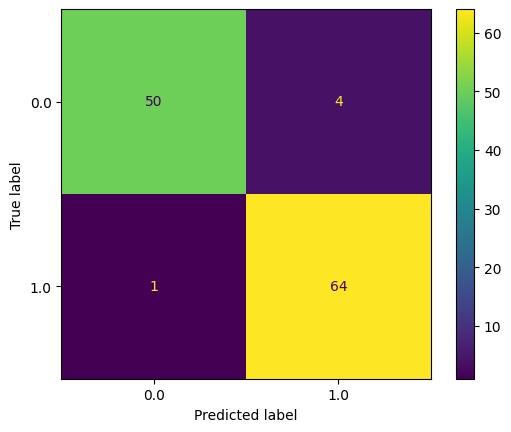

In [75]:
best_model = CatBoostClassifier()
best_model = best_model.fit(X_train,y_train)
y_pred=best_model.predict(X_test)
print(classification_report(y_test,y_pred))
ConfusionMatrixDisplay.from_estimator(best_model,X_test,y_test)

**As you can there is 0.5 percent increase in accuracy in catboost so we can consider as a best model for this classification problem.**